<a href="https://www.kaggle.com/code/jillianassey/customer-churn-analysis?scriptVersionId=279431949" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 1. Business Understanding

Customer churn is when a customer stops using a company’s service.
In the telecom industry, churn is expensive because:
	•	Acquiring new customers costs more than keeping existing ones
	•	Lost customers = lost monthly revenue
	•	Companies want to identify which customers are likely to leave

Project Objective

Build a machine learning model that predicts whether a customer will churn (1) or stay (0) using:
	•	Customer demographics
	•	Usage behavior
	•	Contract details
	•	Service quality
	•	Payment type
	•	Monthly charges

Why this project matters

Companies use churn prediction to:
	•	Target at-risk customers
	•	Reduce customer loss
	•	Improve service quality
	•	Offer proactive discounts or support

This notebook follows a full data science workflow:
	1.	Load and clean telecom churn data
	2.	Explore key churn patterns
	3.	Engineer features
	4.	Train Logistic Regression
	5.	Train Random Forest
	6.	Compare performance
	7.	Provide business recommendations

In [1]:
import pandas as pd

# Load dataset directly from IBM public GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Loading the Dataset

We load the publicly available Telco Customer Churn dataset directly from IBM’s GitHub repository.
	•	Each row represents a customer
	•	Columns represent customer characteristics such as:
	•	Contract type
	•	Payment method
	•	Monthly charges
	•	Internet service
	•	Tenure
	•	Services subscribed
	•	And whether the customer churned

df.head() shows the first 5 rows to understand the dataset structure.


In [2]:
# Make a copy of df to avoid modifying the original
data = df.copy()

# 1. Convert 'TotalCharges' to numeric (it contains spaces that break the model)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

# 2. Drop rows where TotalCharges is still NaN
data = data[data["TotalCharges"].notna()]

# 3. Convert 'Churn' column into numeric (Yes = 1, No = 0)
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

# 4. Drop 'customerID' because it has no predictive value
data = data.drop(columns=["customerID"])

# 5. Reset index
data.reset_index(drop=True, inplace=True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


3. Data Cleaning

Before training a machine learning model, we must clean the data:

3.1 Convert TotalCharges to numeric

This column contains spaces, which look like text.
errors="coerce" turns invalid values into NaN.

3.2 Drop missing TotalCharges

Rows with invalid values are removed because they break the model.

 3.3 Convert Churn to numeric

Machine learning models can only work with numbers.
We convert:
	•	Yes → 1
	•	No → 0
 3.4 Drop customerID

This column is a random identifier and has no predictive power.

Reset index

Cleans dataset after dropping rows.

Now our dataset is clean and ready for analysis.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

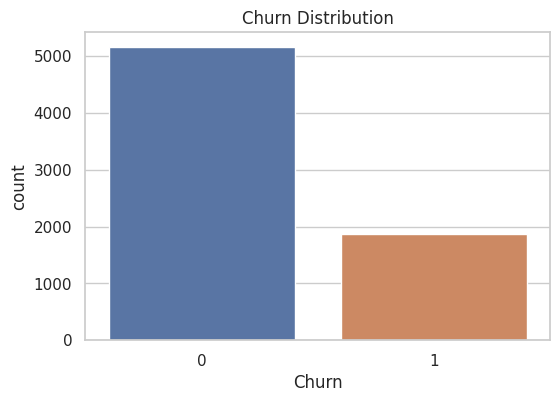

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=data)
plt.title("Churn Distribution")
plt.show()

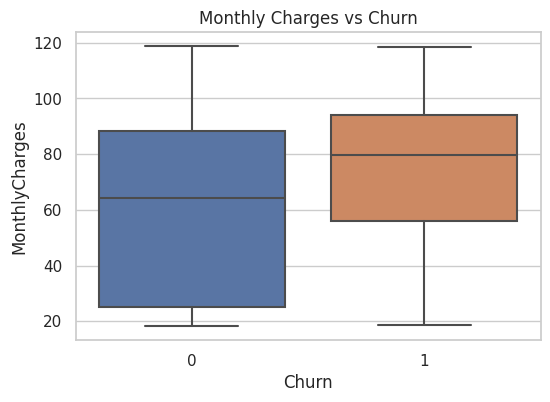

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

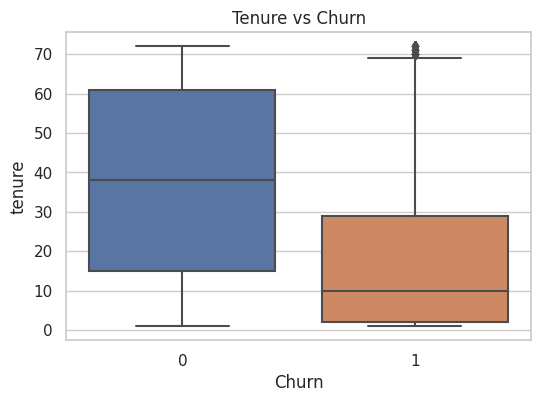

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=data)
plt.title("Tenure vs Churn")
plt.show()

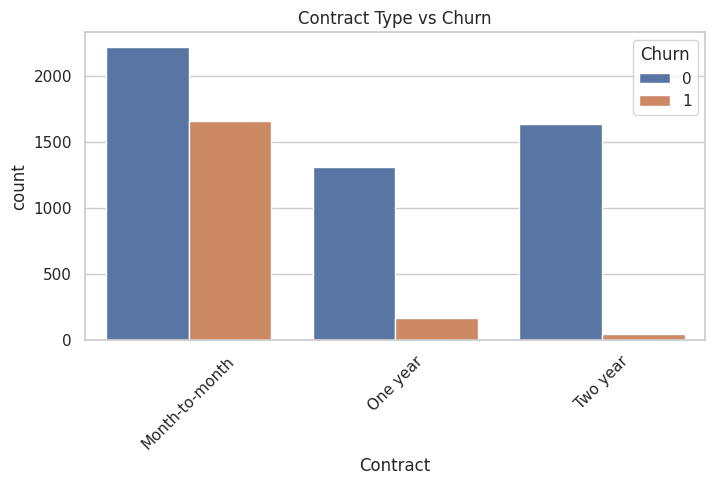

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x="Contract", hue="Churn", data=data)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()

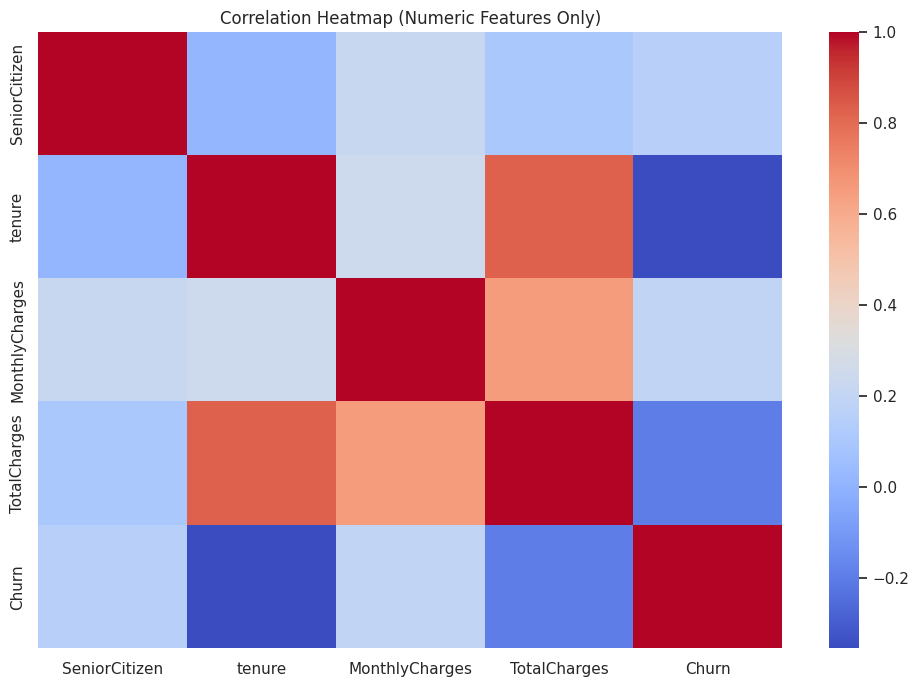

In [8]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

4. Exploratory Data Analysis (EDA)

During EDA, we visualize the most important churn patterns.

 4.1 Churn Distribution

Shows how many customers churned vs stayed.
Usually, churn is lower — imbalance is common.

4.2 Monthly Charges vs Churn

Higher monthly charges often increase churn.

 4.3 Tenure vs Churn

New customers (short tenure) churn more frequently.

 4.4 Contract Type vs Churn

Customers with month-to-month contracts churn the most.
1-year or 2-year contracts reduce churn.

4.5 Correlation Heatmap

Shows relationships between numeric variables.
Tenure is strongly negatively correlated with churn.


In [9]:
# Select important features for modeling
features = [
    "gender", 
    "SeniorCitizen", 
    "Partner", 
    "Dependents", 
    "tenure",
    "PhoneService", 
    "MultipleLines", 
    "InternetService", 
    "OnlineSecurity",
    "OnlineBackup", 
    "DeviceProtection", 
    "TechSupport", 
    "StreamingTV",
    "StreamingMovies", 
    "Contract", 
    "PaperlessBilling", 
    "PaymentMethod",
    "MonthlyCharges", 
    "TotalCharges"
]

X = data[features].copy()
y = data["Churn"]  # target

In [10]:
# Convert categorical columns to numeric dummies
X = pd.get_dummies(X, drop_first=True)

In [11]:
X.head()
X.shape

(7032, 30)

 5. Feature Engineering

Before we train machine learning models, we need to convert all data into numeric form.

5.1 Selecting Features

We choose important features based on domain knowledge.
These include pricing, contract type, service quality, and internet services.

5.2 One-Hot Encoding

Many columns are categorical (text).
Machine learning models cannot understand text, so we convert:
	•	“Male”, “Female” → binary columns
	•	“DSL”, “Fiber optic”, “No internet” → separate columns
	•	“Month-to-month”, “One year”, etc. → multiple dummy columns

pd.get_dummies() handles all of this automatically.

5.3 Result

After encoding:
	•	All columns are numeric
	•	The matrix is ready for machine learning
	•	No more “string to float” errors
	•	No missing values from encoding


In [12]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train.shape, X_test.shape

((5625, 30), (1407, 30))

6. Train/Test Split

To evaluate our machine learning model properly, we split the dataset into:
	•	Training set (80%) → the model learns from this data
	•	Test set (20%) → the model is evaluated on NEW data it has never seen

This prevents the model from “memorizing” the answers and ensures it can generalize to real customers.

In [13]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Predict using the test set
log_pred = log_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.7874911158493249

Confusion Matrix:
 [[917 116]
 [183 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [16]:
log_importance = pd.Series(
    log_model.coef_[0], 
    index=X.columns
).sort_values(ascending=False)

log_importance.head(15)

InternetService_Fiber optic       0.697949
MultipleLines_No phone service    0.336168
PaymentMethod_Electronic check    0.268074
PaperlessBilling_Yes              0.251496
SeniorCitizen                     0.239799
MultipleLines_Yes                 0.189476
StreamingMovies_Yes               0.167585
StreamingTV_Yes                   0.145741
Partner_Yes                       0.040002
MonthlyCharges                    0.006376
TotalCharges                      0.000326
PaymentMethod_Mailed check       -0.032683
gender_Male                      -0.053890
tenure                           -0.061740
DeviceProtection_Yes             -0.070460
dtype: float64

7. Logistic Regression Model

Logistic Regression is a baseline model for binary classification problems like churn prediction.

7.1 Training

The model learns patterns from the training data.

 7.2 Predictions

We apply the model to the test data to see how well it performs.

7.3 Evaluation Metrics
	•	Accuracy → overall model correctness
	•	Precision → how many predicted churns were actually churn
	•	Recall → how many real churns were detected
	•	F1-score → balance between precision and recall
	•	Confusion Matrix → shows correct vs incorrect predictions

7.4 Feature Importance

Logistic Regression provides coefficients that show:
	•	Positive values: increase probability of churn
	•	Negative values: reduce probability of churn

This helps us understand the factors behind churn.


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [18]:
# Predict churn on test data
rf_pred = rf_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.7917555081734187

Confusion Matrix:
 [[934  99]
 [194 180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [20]:
rf_importance = pd.Series(
    rf_model.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

rf_importance.head(15)

TotalCharges                      0.195802
MonthlyCharges                    0.168231
tenure                            0.167302
InternetService_Fiber optic       0.038661
PaymentMethod_Electronic check    0.035773
Contract_Two year                 0.029693
gender_Male                       0.027900
OnlineSecurity_Yes                0.027197
PaperlessBilling_Yes              0.024655
TechSupport_Yes                   0.024462
Contract_One year                 0.024352
Partner_Yes                       0.023671
SeniorCitizen                     0.021580
OnlineBackup_Yes                  0.021368
MultipleLines_Yes                 0.020159
dtype: float64

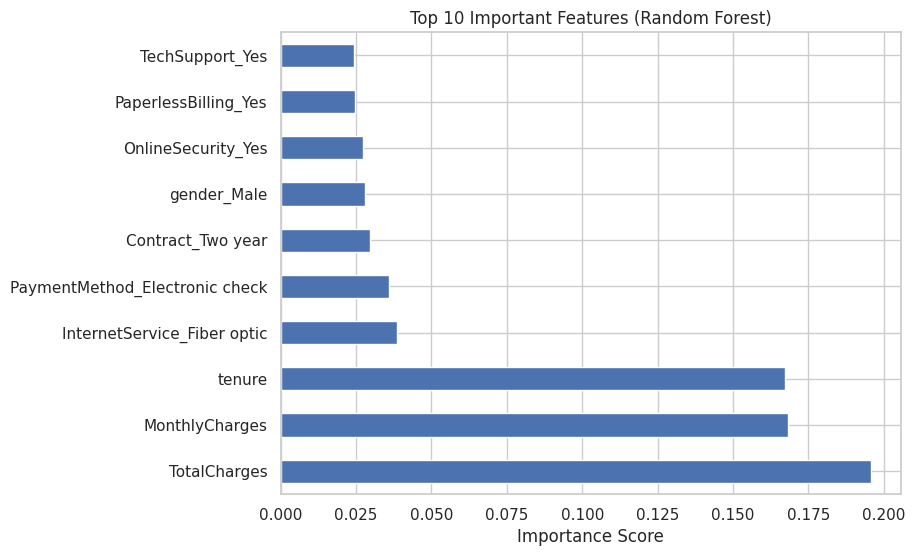

In [21]:
plt.figure(figsize=(8,6))
rf_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

8. Random Forest Model

Random Forest is an ensemble machine learning method that builds multiple decision trees and averages their predictions.

Why Random Forest is powerful
	•	Captures complex, non-linear relationships
	•	Handles large numbers of features
	•	More accurate than Logistic Regression in many cases
	•	Less sensitive to outliers and noise
	•	Provides feature importance scores
 
 Evaluation Metrics

We calculate accuracy, precision, recall, F1-score, and view the confusion matrix to understand performance.

Feature Importance

Random Forest ranks features by importance, helping us understand which factors contribute most to customer churn.

This makes Random Forest a strong candidate for the final business recommendation.


=== Logistic Regression ===
Accuracy: 0.7874911158493249
Confusion Matrix:
 [[917 116]
 [183 191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

=== Random Forest ===
Accuracy: 0.7917555081734187
Confusion Matrix:
 [[934  99]
 [194 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407


=== Model Accuracy Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.787491
1    

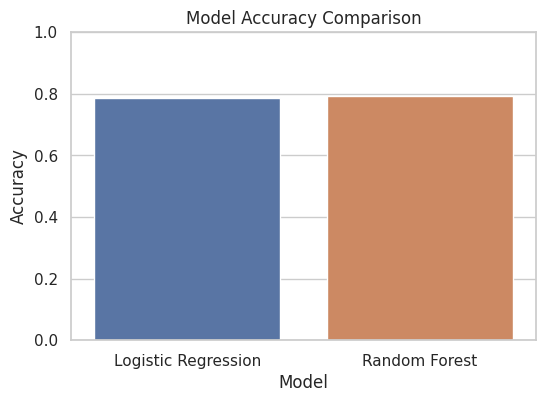

In [22]:
# ============================
# Section 9 — Model Comparison
# ============================

# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# ----------------------------
# 1. Train Logistic Regression
# ----------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
log_pred = log_model.predict(X_test)

# Evaluate
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

# ----------------------------
# 2. Train Random Forest
# ----------------------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# ----------------------------
# 3. Compare Accuracy
# ----------------------------
models = ["Logistic Regression", "Random Forest"]
accuracy_scores = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, rf_pred)
]

comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy_scores
})

# Display comparison
print("\n=== Model Accuracy Comparison ===")
print(comparison_df)

# Visual comparison
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.show()

 9. Model Comparison

We compare Logistic Regression and Random Forest based on accuracy on the test set.
	•	Logistic Regression: simple, interpretable, but may miss non-linear patterns
	•	Random Forest: more complex, captures non-linear patterns, usually higher accuracy

 Why compare models?
	•	Demonstrates model selection skills
	•	Shows ability to evaluate performance
	•	Helps in business decision-making

Result
	•	Pick the model with higher accuracy and better recall for churn which is Random Forest with 79.2% accuracy
	•	This model will be used for business insights and recommendations

Top 10 Important Features:
TotalCharges                      0.195802
MonthlyCharges                    0.168231
tenure                            0.167302
InternetService_Fiber optic       0.038661
PaymentMethod_Electronic check    0.035773
Contract_Two year                 0.029693
gender_Male                       0.027900
OnlineSecurity_Yes                0.027197
PaperlessBilling_Yes              0.024655
TechSupport_Yes                   0.024462
dtype: float64


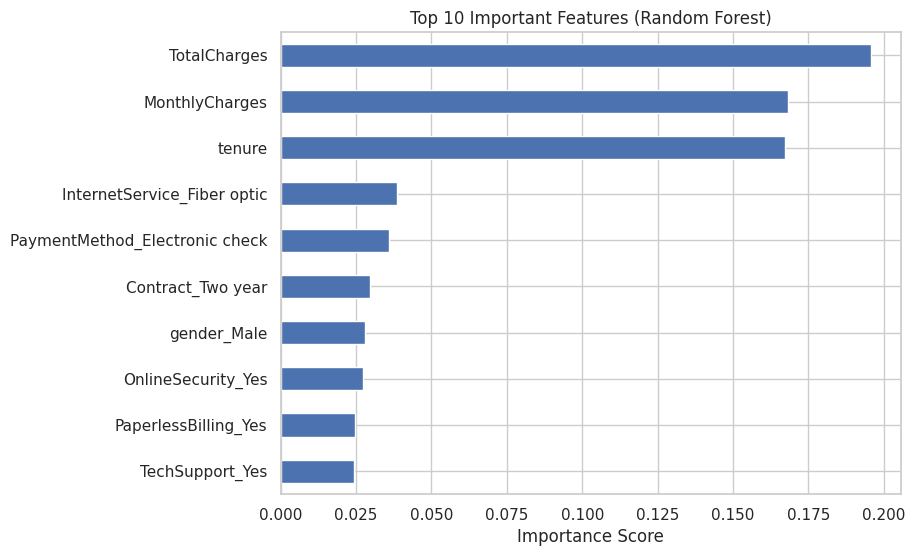

In [23]:
# Get feature importance
rf_importance = pd.Series(
    rf_model.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

# Display top 10 features
print("Top 10 Important Features:")
print(rf_importance.head(10))

# Plot top 10 features
plt.figure(figsize=(8,6))
rf_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [24]:
import joblib

# Export model
joblib.dump(rf_model, "rf_churn_model.pkl")
print("Random Forest model saved!")

# Export processed data
X.to_csv("processed_churn_data.csv", index=False)
print("Processed data saved!")

Random Forest model saved!
Processed data saved!


Project Title: Customer Churn Prediction
Objective: Predict which customers are likely to churn using Logistic Regression and Random Forest
Technologies Used: Python, Pandas, Seaborn, Scikit-learn
Highlights:
	•	Data Cleaning & EDA
	•	Feature Engineering & One-Hot Encoding
	•	Model Comparison (Logistic Regression vs Random Forest)
	•	Business Insights & Feature Importance
	•	Exported Model & Data
